# Simple Linear Regression (For Loop)

In this notebook we use a different data set to practice what we have learned so far:
* Upload and preprocess the data
* Write a function to compute the Simple Linear Regression weights
* Write a function to make predictions of the output given the input feature
* Compare different models for predicting house prices

# Upload and preprocess the data

Dataset on insurance data (insurance.csv) is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.

In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv')
# Look at the table to check potential features
data[:10]

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


# Split data into training and testing

In [2]:
from sklearn.model_selection import train_test_split
# Split data set into 80% train and 20% test data 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Look at the shape to check the split ratio
train_data.shape, test_data.shape

((1070, 7), (268, 7))

# Compute average prices and sum of squares

In [3]:
# The average expense can be computed in two different ways. First get the expenses:
expenses = train_data['expenses'] # extract the expense column

# The arithmetic average (the mean) is the sum of the expenses divided by the total number of entries:
sum_expenses = expenses.sum()
num_entries = len(expenses)
avg_expense_1 = sum_expenses / num_entries

# There is already a mean function that we can use
avg_expense_2 = expenses.mean()

print('Average expense via arithmetic average: ' + str(avg_expense_1))
print('Average expense via mean function: ' + str(avg_expense_2))

Average expense via arithmetic average: 13346.089869158879
Average expense via mean function: 13346.089869158879


As we see both ways led to the same result

In [4]:
# Let's compute the sum of squares of expenses.
expenses_squared = expenses*expenses
sum_expenses_squared = expenses_squared.sum()
print('The sum of expenses squared is: ' + str(sum_expenses_squared))

The sum of expenses squared is: 345023357811.3642


# Build a generic simple linear regression function 

Let's build a closed form solution (function) to compute the slope and intercept for a simple linear regression.

In [5]:
def simple_linear_regression(input_feature, output):
    n = len(input_feature)
    # compute the sum of input_feature and output
    x_sum = input_feature.sum()
    y_sum = output.sum()
    # compute the product of the output and the input_feature and its sum
    xy = input_feature * output
    xy_sum = xy.sum()
    # compute the squared value of the input_feature and its sum
    x_squared = input_feature * input_feature
    x_squared_sum = x_squared.sum()
    # use the formula for the slope
    slope = (xy_sum - x_sum * y_sum / n) / (x_squared_sum - x_sum * x_sum / n)
    # use the formula for the intercept
    intercept = y_sum / n - slope * x_sum / n
    return (intercept, slope)

Now let's use that function of a simple regression model for predicting expenses based on bmi - rembember that we train on train_data!

In [6]:
bmi_intercept, bmi_slope = simple_linear_regression(train_data['bmi'], train_data['expenses'])

print('Intercept: ' + str(bmi_intercept))
print('Slope: ' + str(bmi_slope))

Intercept: 1338.9995321143706
Slope: 392.8745366615484


# Predicting values

With the model parameters 'intercept & slope' we can now write a function to return the predicted output - given the input_feature, slope and intercept:

In [7]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + input_feature * slope
    return predicted_values

Now that we have this function let's make a prediction. 

* What is the estimated expense for an entry according to the bmi model we estiamted above?

In [8]:
my_bmi = 23
estimated_expense = get_regression_predictions(my_bmi, 
                                             bmi_intercept, 
                                             bmi_slope)

print('The estimated expense for a bmi of %d is $%.2f' % (my_bmi, estimated_expense))

The estimated expense for a bmi of 23 is $10375.11


# Additional Task: For Loops

In [9]:
# Simple concept of a for loop with range command
for i in range(1, 8):
    print(i, i ** 2)
print('end of loop')

1 1
2 4
3 9
4 16
5 25
6 36
7 49
end of loop


## Adapt this to get the respective expenses for bmi in the range of 20 to 40 with stepsize 1

In [10]:
for i in range(20, 41):
    my_bmi = i
    estimated_expense = get_regression_predictions(my_bmi, 
                                             bmi_intercept, 
                                             bmi_slope)

    print('The estimated expense for a bmi of %d is $%.2f' % (my_bmi, estimated_expense))

The estimated expense for a bmi of 20 is $9196.49
The estimated expense for a bmi of 21 is $9589.36
The estimated expense for a bmi of 22 is $9982.24
The estimated expense for a bmi of 23 is $10375.11
The estimated expense for a bmi of 24 is $10767.99
The estimated expense for a bmi of 25 is $11160.86
The estimated expense for a bmi of 26 is $11553.74
The estimated expense for a bmi of 27 is $11946.61
The estimated expense for a bmi of 28 is $12339.49
The estimated expense for a bmi of 29 is $12732.36
The estimated expense for a bmi of 30 is $13125.24
The estimated expense for a bmi of 31 is $13518.11
The estimated expense for a bmi of 32 is $13910.98
The estimated expense for a bmi of 33 is $14303.86
The estimated expense for a bmi of 34 is $14696.73
The estimated expense for a bmi of 35 is $15089.61
The estimated expense for a bmi of 36 is $15482.48
The estimated expense for a bmi of 37 is $15875.36
The estimated expense for a bmi of 38 is $16268.23
The estimated expense for a bmi of

## Adapt this to get the respective expenses for bmi in the range of 10 to 40 with stepsize 5

In [11]:
for i in range(2, 9):
    my_bmi = i*5
    estimated_expense = get_regression_predictions(my_bmi, 
                                             bmi_intercept, 
                                             bmi_slope)

    print('The estimated expense for a bmi of %d is $%.2f' % (my_bmi, estimated_expense))

The estimated expense for a bmi of 10 is $5267.74
The estimated expense for a bmi of 15 is $7232.12
The estimated expense for a bmi of 20 is $9196.49
The estimated expense for a bmi of 25 is $11160.86
The estimated expense for a bmi of 30 is $13125.24
The estimated expense for a bmi of 35 is $15089.61
The estimated expense for a bmi of 40 is $17053.98


# Your individual task 1: Build models for other features!

Answer the following questions by applying what you have learned so far:

* What is the estimated expense for an entry at age 36?
* What is the estimated expense for an entry 2 children?

Go through the entire notebook first and think: What can be reused and what needs to be changed? (15min)

=> Present your thoughts to the group!

Now add more code and variables where needed! (45min)

=> Present your code to the group!


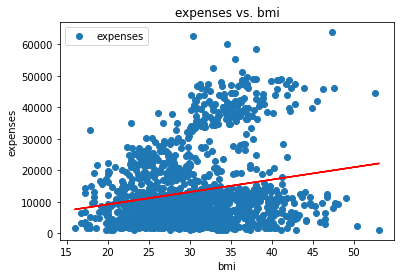

In [12]:
# Your code here...
import matplotlib.pyplot as plt
import numpy as np

def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    return predicted_values

def plot_function(intercept, slope):
    axes = plt.gca() # get current axes
    x_vals = train_data['bmi']
    y_vals = get_regression_predictions(train_data['bmi'], intercept, slope)
    plt.plot(x_vals, y_vals, 'r-')
    
# Plot some feature relations

data.plot(x='bmi', y='expenses', style='o')
plt.title('expenses vs. bmi')
plot_function(bmi_intercept, bmi_slope)
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.show()

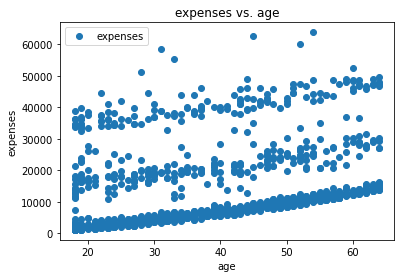

In [13]:
import matplotlib.pyplot as plt
data.plot(x='age', y='expenses', style='o')
plt.title('expenses vs. age')
plt.xlabel('age')
plt.ylabel('expenses')
plt.show()

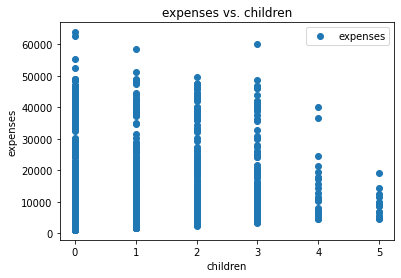

In [14]:
import matplotlib.pyplot as plt
data.plot(x='children', y='expenses', style='o')
plt.title('expenses vs. children')
plt.xlabel('children')
plt.ylabel('expenses')
plt.show()

# Residual Sum of Squares

Now we want to evaluate our models using Residual Sum of Squares (RSS) via a function. 

Recall that RSS is the sum of the squares of the residuals and the residuals are the respective differences between the predicted output and the true output. 

In [15]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predicted_output = get_regression_predictions(input_feature, intercept, slope)
    # Compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = predicted_output - output
    # Square the residuals and add them up
    residuals_squared = residuals * residuals
    RSS = residuals_squared.sum()
    return(RSS)

Now let's use the function to calculate the RSS on training data from the bmi model calculated above.

In [16]:
rss_expenses_on_bmi_train = get_residual_sum_of_squares(train_data['bmi'], 
                                                 train_data['expenses'], 
                                                 bmi_intercept, 
                                                 bmi_slope)

print('The RSS of predicting expenses based on bmi is : ' + str(rss_expenses_on_bmi_train))

The RSS of predicting expenses based on bmi is : 148410978320.20258


# Your individual task 2: Test your Linear Regression algorithm

If we have more models for predicting the expenses of an entry, how do we know which one is better? 

Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model) and identify which model works best:

* Simple Linear Regression on bmi?
* Simple Linear Regression on age?
* Simple Linear Regression on # children?

(45min)

In [17]:
# Compute RSS when using Square Feet (living) on TEST data:
rss_expenses_on_bmi_test = get_residual_sum_of_squares(test_data['bmi'], 
                                                 test_data['expenses'], 
                                                 bmi_intercept, 
                                                 bmi_slope)

print('The test data RSS of predicting expenses based on bmi is: ' + str(rss_expenses_on_bmi_test))

The test data RSS of predicting expenses based on bmi is: 39949730749.649025


# Additional task: What BMI can you buy for $12000